In [ ]:
 import csv
import numpy as np
import select  as sl
from numpy import set_printoptions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from scipy.stats import gaussian_kde

df = pd.read_excel("PCOS.xls", sheet_name=1)

In [ ]:
#Converting object data type to numeric type
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

In [ ]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip())

In [ ]:
#dropping axes which are not useful
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis

<Axes: >

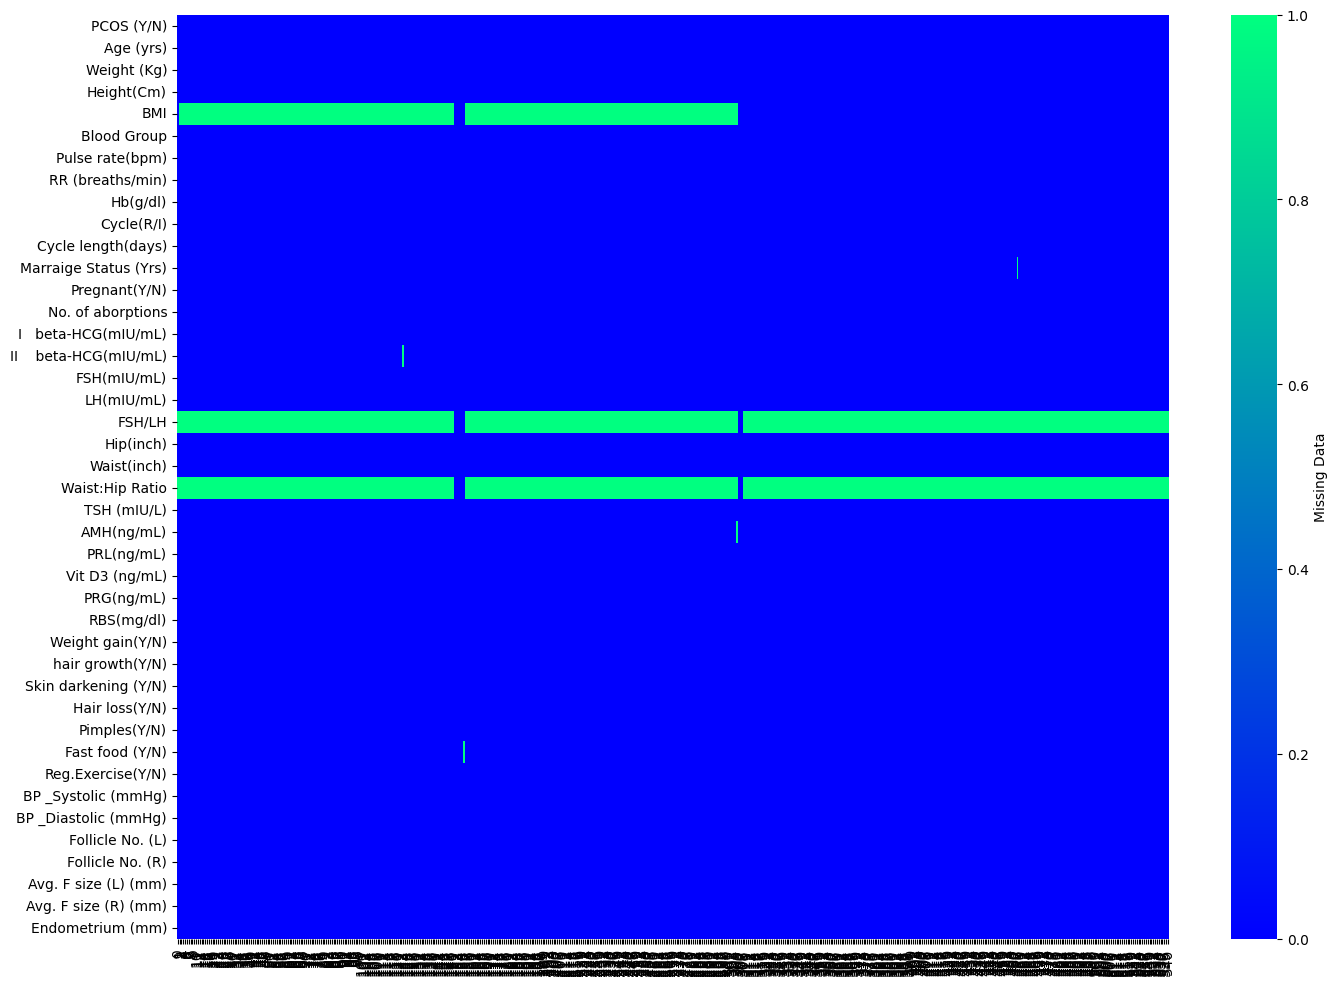

In [ ]:
#HANDLING MISSING VALUES
#plotting heatmap to visualize missing values
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="winter",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)

In [ ]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['BMI',
 'Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'FSH/LH',
 'Waist:Hip Ratio',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [ ]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

In [ ]:
#Verifying if any missing values are left
df.columns[df.isna().any()].tolist() #no more missing values left

[]

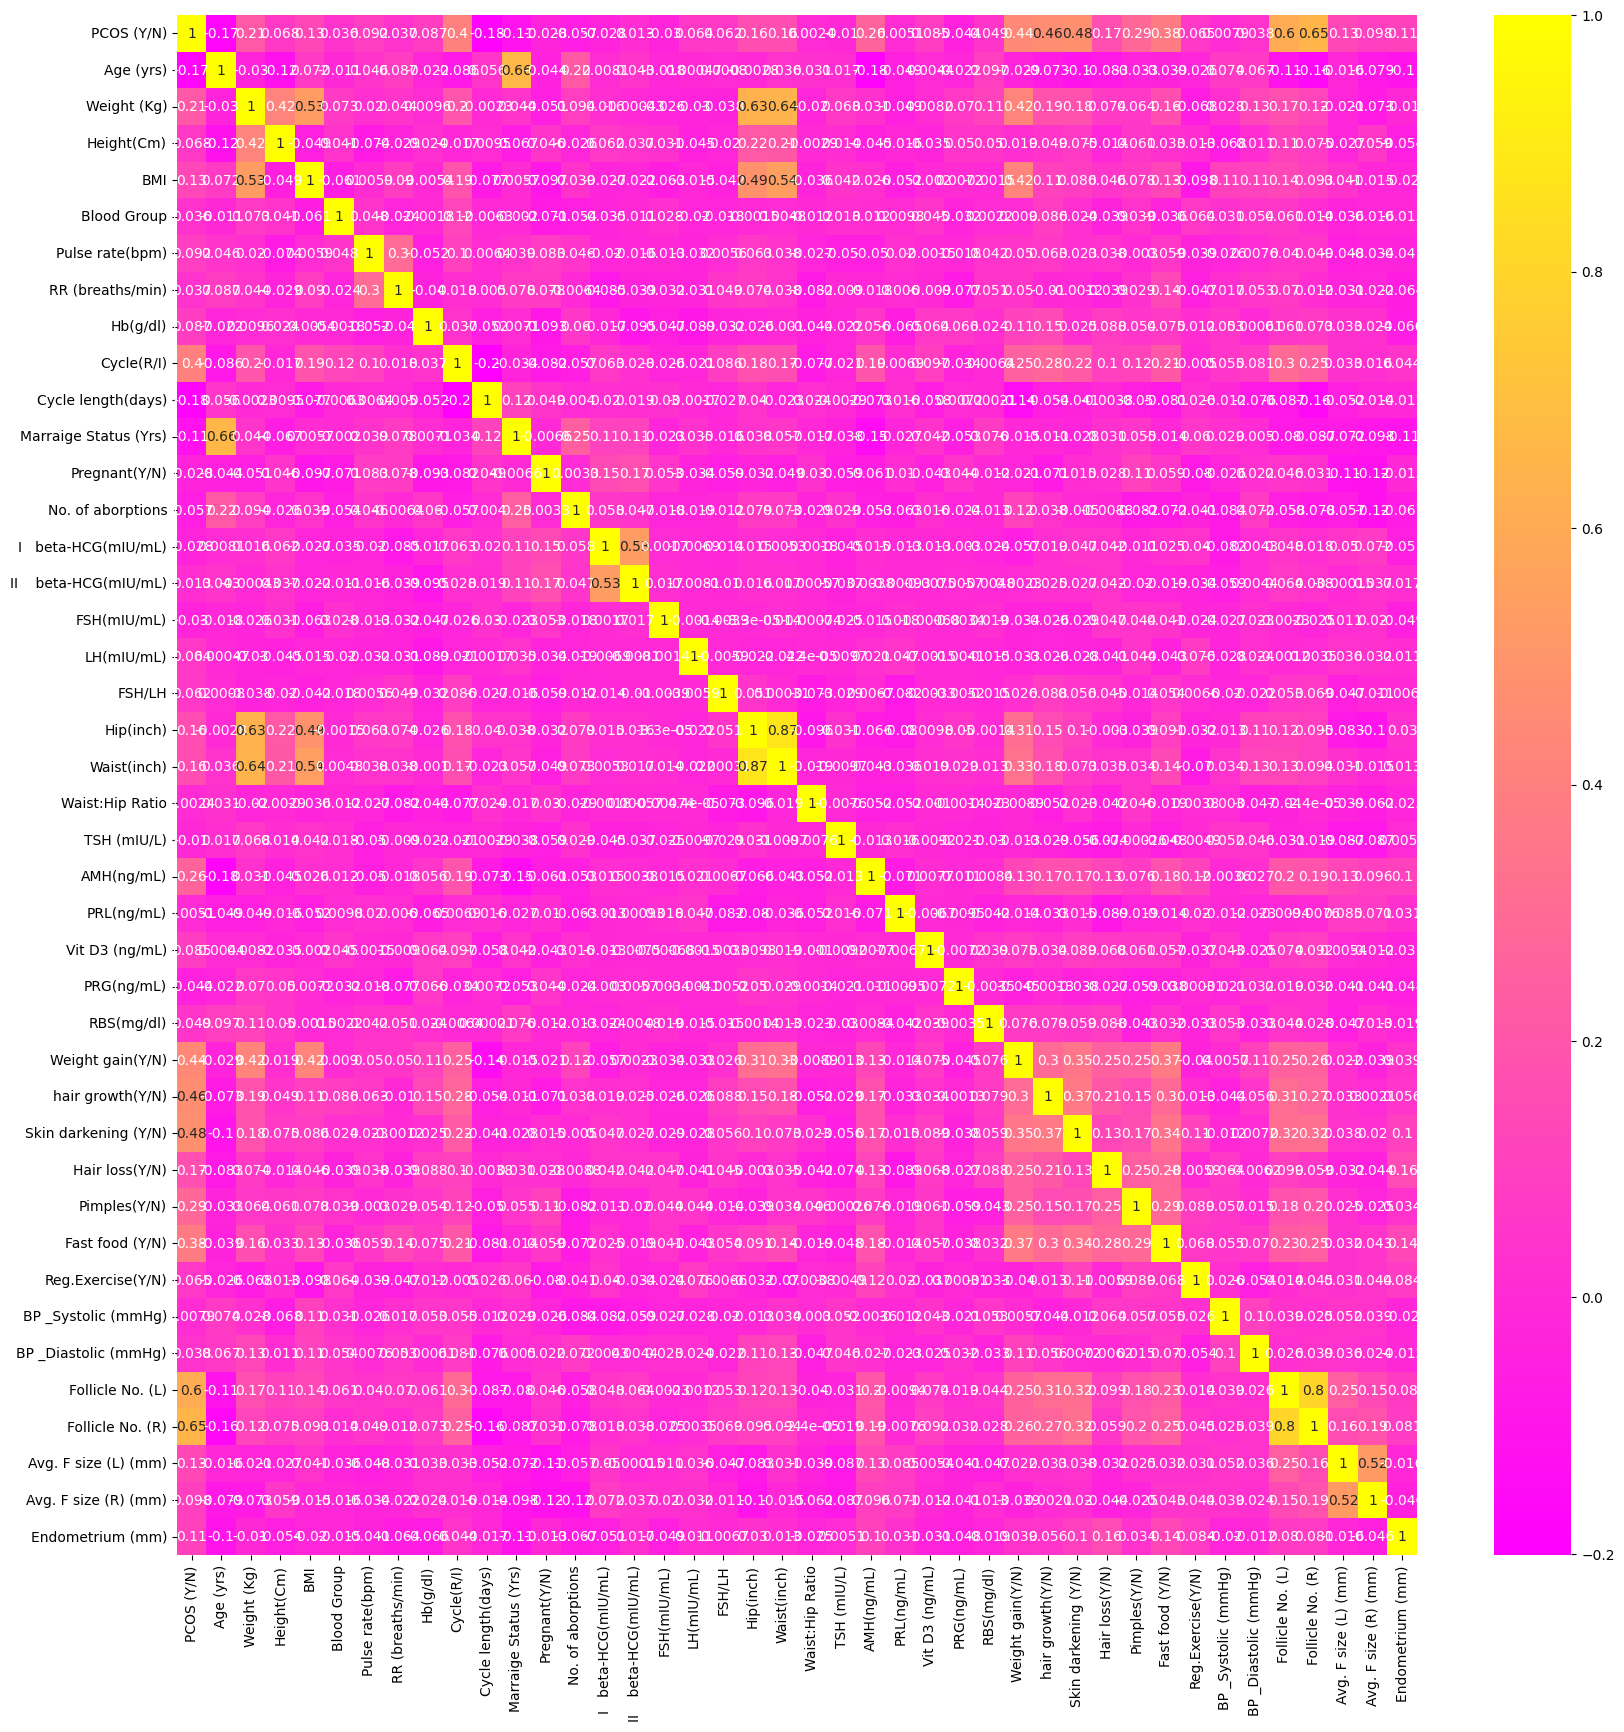

In [ ]:
#Plotting correlation heatmap
plt.figure(figsize=(20, 20))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="spring", annot=True)

# displaying heatmap
plt.show()

In [ ]:
#Checking how different features are correlated to PCOS
df.corr()["PCOS (Y/N)"].sort_values(ascending=False) #sorting in descending order

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
BMI                       0.134635
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
FSH/LH                    0.062169
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group         

In [ ]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [ ]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Waist:Hip Ratio',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [ ]:
numerical_variables

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [ ]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [ ]:
df.value_counts()
target_name = 'PCOS (Y/N)'
y= df[target_name]
X= df.drop(target_name, axis=1)
print(X)
type(df)

     Age (yrs)  Weight (Kg)  Height(Cm)   BMI  Blood Group  Pulse rate(bpm)  \
0           28         44.6     152.000  19.3           15               78   
1           36         65.0     161.500  24.0           15               74   
2           33         68.8     165.000  24.0           11               72   
3           37         65.0     148.000  24.0           13               72   
4           25         52.0     161.000  24.0           11               72   
..         ...          ...         ...   ...          ...              ...   
536         35         50.0     164.592  18.5           17               72   
537         30         63.2     158.000  25.3           15               72   
538         36         54.0     152.000  23.4           13               74   
539         27         50.0     150.000  22.2           15               74   
540         23         82.0     165.000  30.1           13               80   

     RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  Cycle 

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (362, 41) (362,)
Test (179, 41) (179,)


In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

 # feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [ ]:
for i in range(len(fs.scores_)):


   print('Feature %d: %f' % (i, fs.scores_[i]*100))

Feature 0: 3036.643522
Feature 1: 15312.352035
Feature 2: 969.809719
Feature 3: 3362.351052
Feature 4: 271.479927
Feature 5: 392.217728
Feature 6: 21.463259
Feature 7: 417.806192
Feature 8: 4443.956211
Feature 9: 566.658378
Feature 10: 3045.740107
Feature 11: 88.969563
Feature 12: 146.597867
Feature 13: 11258.004322
Feature 14: 593.363731
Feature 15: 41600.981538
Feature 16: 3914.232004
Feature 17: 0.307855
Feature 18: 971.508691
Feature 19: 898.900564
Feature 20: 1.101142
Feature 21: 56.776671
Feature 22: 70976.735624
Feature 23: 34.411667
Feature 24: 10556.999396
Feature 25: 2489.245475
Feature 26: 860.968823
Feature 27: 3593.704668
Feature 28: 5761.510986
Feature 29: 6055.857174
Feature 30: 967.541671
Feature 31: 1729.526822
Feature 32: 2250.842588
Feature 33: 96.759684
Feature 34: 1.520120
Feature 35: 8.273152
Feature 36: 35545.953596
Feature 37: 41274.619487
Feature 38: 1638.581577
Feature 39: 453.391886
Feature 40: 2497.929509


Feature 1: 15312.352035
1
Feature 13: 11258.004322
13
Feature 15: 41600.981538
15
Feature 22: 70976.735624
22
Feature 24: 10556.999396
24
Feature 28: 5761.510986
28
Feature 29: 6055.857174
29
Feature 36: 35545.953596
36
Feature 37: 41274.619487
37
[1, 13, 15, 22, 24, 28, 29, 36, 37]


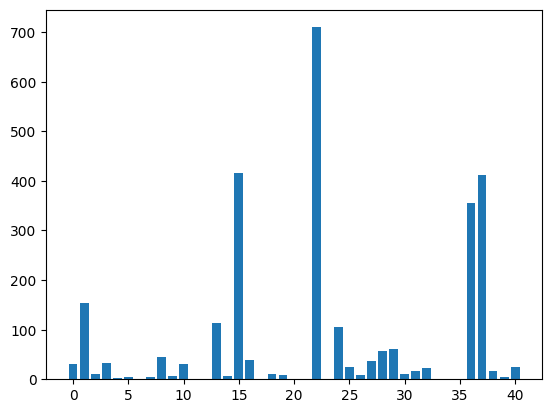

In [ ]:
# what are scores for the features
list_a=[]
for i in range(len(fs.scores_)):
  if (fs.scores_[i]*100)  >5000 :
   cols=i
   list_a.append(cols)

   print('Feature %d: %f' % (i, fs.scores_[i]*100))
   print(cols)
print(list_a)
df1=df[df.columns[list_a]]
   #print('Feature %d: %f' % (i, fs.scores_[i]*100))
   #print(cols)
   #print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [ ]:
# feature selection
df1

,Age (yrs),No. of aborptions,II beta-HCG(mIU/mL),TSH (mIU/L),PRL(ng/mL),Weight gain(Y/N),hair growth(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
0,28,0,1.99,0.68,45.16,0,0,80,3
1,36,0,1.99,3.16,20.09,0,0,70,3
2,33,0,494.08,2.54,10.52,0,0,80,13
3,37,0,1.99,16.41,36.90,0,0,70,2
4,25,0,801.45,3.57,30.09,0,0,80,3
...,...,...,...,...,...,...,...,...,...
536,35,1,1.99,1.11,5.30,0,0,70,1
537,30,1,1.99,2.05,21.09,1,0,70,9
538,36,0,1.99,2.87,96.41,0,0,80,1
539,27,0,1.99,2.50,38.89,0,0,70,7


In [ ]:
df1.head()

,Age (yrs),No. of aborptions,II beta-HCG(mIU/mL),TSH (mIU/L),PRL(ng/mL),Weight gain(Y/N),hair growth(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
0,28,0,1.99,0.68,45.16,0,0,80,3
1,36,0,1.99,3.16,20.09,0,0,70,3
2,33,0,494.08,2.54,10.52,0,0,80,13
3,37,0,1.99,16.41,36.90,0,0,70,2
4,25,0,801.45,3.57,30.09,0,0,80,3
